In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('datasets/Social_Network_Ads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [3]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
fig = px.scatter(
                    df, 
                    x='Age',
                    y='EstimatedSalary',
                    color='Purchased',
                    title='age/salary grps',)
fig.show()

In [4]:
X = df[['Age','EstimatedSalary']]
y= df['Purchased']

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
sX = StandardScaler()
x = sX.fit_transform(X)

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.3, random_state = 0)

In [14]:
clf = LogisticRegression()
clf.fit(xtrain,ytrain)
clf.score(xtest,ytest)

0.8666666666666667

In [16]:
ypred = clf.predict(xtest)

In [42]:
data = np.concatenate([ytest.values.reshape(-1,1), ypred.reshape(-1,1)],axis=1)
results = pd.DataFrame(data,columns=['orignal','prediction'])

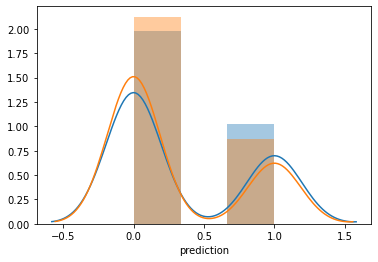

In [47]:
sns.distplot(results['orignal'],)
sns.distplot(results['prediction'],)
plt.show()

In [49]:
df['predictions'] = clf.predict(x)

,User ID,Gender,Age,EstimatedSalary,Purchased,predictions
0,15624510,Male,19,19000,0,0
1,15810944,Male,35,20000,0,0
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,0
5,15728773,Male,27,58000,0,0
6,15598044,Female,27,84000,0,0
7,15694829,Female,32,150000,1,1
8,15600575,Male,25,33000,0,0
9,15727311,Female,35,65000,0,0


In [53]:
fig = px.scatter(
                    df, 
                    x='Age',
                    y='EstimatedSalary',
                    color='predictions',
                    title='age/salary grps',)
fig.show()